In [1]:
# import libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import lilliefors
pd.set_option('display.max_rows', None, 'display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [65]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
df = pd.read_excel('US-EU-NA&ME.xlsx')
df.head()

,location,sex,cause,year,val,upper,lower
0,EU,Male,Cardiovascular diseases,1990,452.504624,460.364190,436.983852
1,EU,Female,Cardiovascular diseases,1990,493.432908,513.083147,452.913917
2,EU,Male,Diabetes and kidney diseases,1990,27.070256,27.667113,26.136084
3,EU,Female,Diabetes and kidney diseases,1990,37.429464,38.862588,34.440083
4,US,Male,Cardiovascular diseases,1990,348.995208,357.858667,334.031559


In [3]:
df['val'] = df['val'].astype('int')
df.head()

,location,sex,cause,year,val,upper,lower
0,EU,Male,Cardiovascular diseases,1990,452,460.364190,436.983852
1,EU,Female,Cardiovascular diseases,1990,493,513.083147,452.913917
2,EU,Male,Diabetes and kidney diseases,1990,27,27.667113,26.136084
3,EU,Female,Diabetes and kidney diseases,1990,37,38.862588,34.440083
4,US,Male,Cardiovascular diseases,1990,348,357.858667,334.031559


In [4]:
# created grouped dataframes region and cause

grouped_country = df.drop(['upper','lower'], axis=1).groupby(['location','cause'])
for group in grouped_country:
    print(group[1][0:5])
    print('============================================')
    print()

   location     sex                    cause  year  val
0        EU    Male  Cardiovascular diseases  1990  452
1        EU  Female  Cardiovascular diseases  1990  493
8        EU    Male  Cardiovascular diseases  1991  449
9        EU  Female  Cardiovascular diseases  1991  490
40       EU    Male  Cardiovascular diseases  1993  441

   location     sex                         cause  year  val
2        EU    Male  Diabetes and kidney diseases  1990   27
3        EU  Female  Diabetes and kidney diseases  1990   37
12       EU    Male  Diabetes and kidney diseases  1991   27
13       EU  Female  Diabetes and kidney diseases  1991   37
30       EU    Male  Diabetes and kidney diseases  1993   27

   location     sex                    cause  year  val
10  NA & ME    Male  Cardiovascular diseases  1990  223
11  NA & ME  Female  Cardiovascular diseases  1990  197
20  NA & ME    Male  Cardiovascular diseases  1991  221
21  NA & ME  Female  Cardiovascular diseases  1991  195
36  NA & ME    M

In [5]:
# created grouped dataframes region, sex and cause

grouped_country_gender = df.drop(['upper','lower'], axis=1).groupby(['location','sex','cause'])
for group in grouped_country_gender:
    print(group[1][0:5])
    print('===================================================')
    print()

   location     sex                    cause  year  val
1        EU  Female  Cardiovascular diseases  1990  493
9        EU  Female  Cardiovascular diseases  1991  490
41       EU  Female  Cardiovascular diseases  1993  484
43       EU  Female  Cardiovascular diseases  1992  485
65       EU  Female  Cardiovascular diseases  1994  479

   location     sex                         cause  year  val
3        EU  Female  Diabetes and kidney diseases  1990   37
13       EU  Female  Diabetes and kidney diseases  1991   37
31       EU  Female  Diabetes and kidney diseases  1993   37
47       EU  Female  Diabetes and kidney diseases  1992   37
67       EU  Female  Diabetes and kidney diseases  1994   37

   location   sex                    cause  year  val
0        EU  Male  Cardiovascular diseases  1990  452
8        EU  Male  Cardiovascular diseases  1991  449
40       EU  Male  Cardiovascular diseases  1993  441
42       EU  Male  Cardiovascular diseases  1992  444
64       EU  Male  Cardiov

# Deaths trend for both diseases over the years

In [6]:
# individual regions & Cardiovascular diseases

US_car = grouped_country.get_group(('US','Cardiovascular diseases')).sort_values(by='year')
EU_car = grouped_country.get_group(('EU','Cardiovascular diseases')).sort_values(by='year')
NA_ME_car = grouped_country.get_group(('NA & ME','Cardiovascular diseases')).sort_values(by='year')

In [7]:
# individual regions & Cardiovascular diseases for line plot

US_car_line = US_car.sort_values(by='year').groupby('year', as_index=False).sum()
EU_car_line = EU_car.sort_values(by='year').groupby('year', as_index=False).sum()
NA_ME_car_line = NA_ME_car.sort_values(by='year').groupby('year', as_index=False).sum()

In [18]:
# individual regions & Diabetes and kidney diseases

US_dia = grouped_country.get_group(('US','Diabetes and kidney diseases')).sort_values(by='year')
EU_dia = grouped_country.get_group(('EU','Diabetes and kidney diseases')).sort_values(by='year')
NA_ME_dia = grouped_country.get_group(('NA & ME','Diabetes and kidney diseases')).sort_values(by='year')

In [19]:
# individual regions & Diabetes and kidney diseases for line plot

US_dia_line = US_dia.sort_values(by='year').groupby('year', as_index=False).sum()
EU_dia_line = EU_dia.sort_values(by='year').groupby('year', as_index=False).sum()
NA_ME_dia_line = NA_ME_dia.sort_values(by='year').groupby('year', as_index=False).sum()

In [48]:
# regions concatenated
concat_countries_car = pd.concat([US_car, EU_car, NA_ME_car], axis=0, ignore_index=True)

concat_countries_dia = pd.concat([US_dia, EU_dia, NA_ME_dia], axis=0, ignore_index=True)

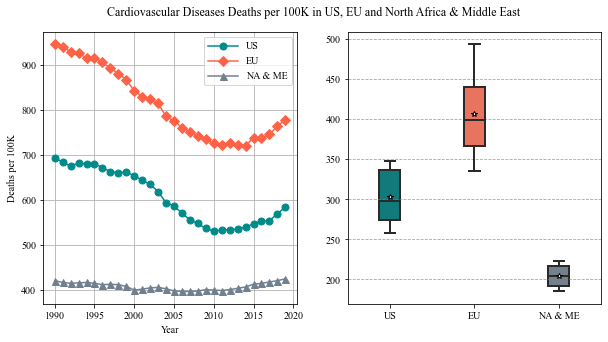

In [125]:
plt.figure(figsize=(10,5))
# line plot
plt.subplot(1, 2, 1)
plt.plot(US_car_line['year'], US_car_line['val'], color='#008B8B', marker='o', ms=7)
plt.plot(EU_car_line['year'], EU_car_line['val'], color='#FF6347', marker='D', ms=7)
plt.plot(NA_ME_car_line['year'], NA_ME_car_line['val'], color='#708090', marker='^', ms=7)
plt.legend(['US','EU','NA & ME'], handlelength=3)
plt.xlabel('Year')
plt.ylabel('Deaths per 100K')
#plt.ylim([0,1000])
plt.grid()
# box plot
plt.subplot(1, 2, 2)
sns.boxplot(x="location", hue="location", y="val", data = concat_countries_car, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 palette=['#008B8B','#FF6347', '#708090'], dodge =False, width=0.25)

plt.xticks(ticks=[0, 1, 2], labels=['US','EU', 'NA & ME'], rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', color='gray', linestyle='dashed', alpha=0.7)
plt.legend().remove()
#plt.ylim([0,60])

# customize font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.size"] = 10
plt.rcParams["text.color"] = 'k'


plt.suptitle("Cardiovascular Diseases Deaths per 100K in US, EU and North Africa & Middle East",
            x=0.5, y=0.95)

plt.savefig('Cardiovascular Diseases_1.png')
plt.show()

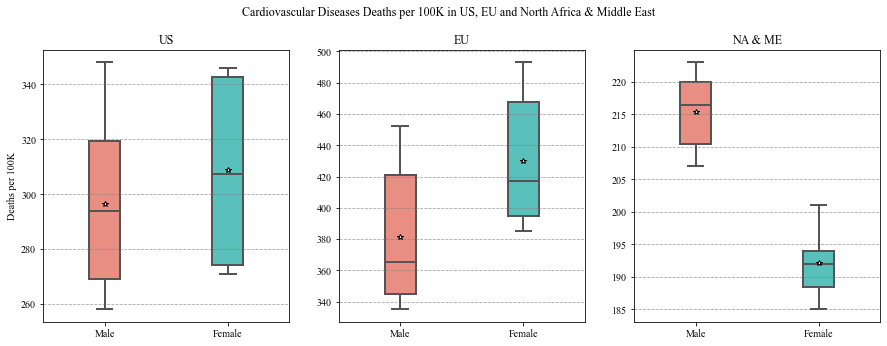

In [126]:
# box plots for genders per region

plt.figure(figsize=(15,5))
# US
plt.subplot(1, 3, 1)
sns.boxplot(x="sex", hue="sex", y="val", data = US_car, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

plt.xticks(ticks=[0, 1], labels=['Male','Female'], rotation=0)
plt.grid(axis='y', color='gray', linestyle='dashed', alpha=0.7)
plt.legend().remove()
plt.title('US')
plt.xlabel('')
plt.ylabel('Deaths per 100K')
#plt.ylim([0,60])

# EU
plt.subplot(1, 3, 2)
sns.boxplot(x="sex", hue="sex", y="val", data = EU_car, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

plt.xticks(ticks=[0, 1], labels=['Male','Female'], rotation=0)
plt.grid(axis='y', color='gray', linestyle='dashed', alpha=0.7)
plt.legend().remove()
plt.title('EU')
plt.xlabel('')
plt.ylabel('')
#plt.ylim([0,55])

# NA & ME
plt.subplot(1, 3, 3)
sns.boxplot(x="sex", hue="sex", y="val", data = NA_ME_car, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

plt.xticks(ticks=[0, 1], labels=['Male','Female'], rotation=0)
plt.grid(axis='y', color='gray', linestyle='dashed', alpha=0.7)
plt.legend().remove()
plt.title('NA & ME')
plt.xlabel('')
plt.ylabel('')
# plt.ylim([0,60])

# customize font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.size"] = 10
plt.rcParams["text.color"] = 'k'

plt.suptitle("Cardiovascular Diseases Deaths per 100K in US, EU and North Africa & Middle East",
            x=0.5, y=1)

plt.savefig('Cardiovascular Diseases_2.png')
plt.show()

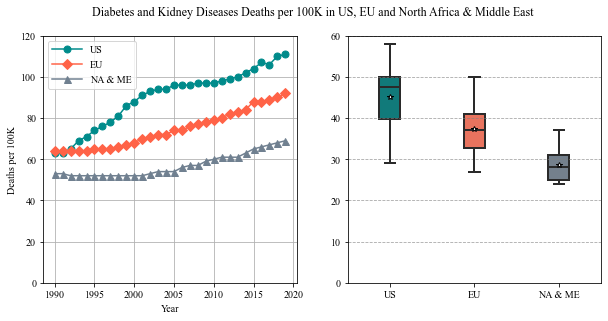

In [127]:
plt.figure(figsize=(10,10))

# line plot
plt.subplot(2, 2, 1)
plt.plot(US_dia_line['year'], US_dia_line['val'], color='#008B8B', marker='o', ms=7)
plt.plot(EU_dia_line['year'], EU_dia_line['val'], color='#FF6347', marker='D', ms=7)
plt.plot(NA_ME_dia_line['year'], NA_ME_dia_line['val'], color='#708090', marker='^', ms=7)
plt.legend(['US','EU','NA & ME'], handlelength=3)
plt.xlabel('Year')
plt.ylabel('Deaths per 100K')
plt.ylim([0,120])
plt.grid()

# box plot for regions
plt.subplot(2, 2, 2)
sns.boxplot(x="location", hue="location", y="val", data = concat_countries_dia, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 palette=['#008B8B','#FF6347', '#708090'], dodge =False, width=0.25)

plt.xticks(ticks=[0, 1, 2], labels=['US','EU', 'NA & ME'], rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', color='gray', linestyle='dashed', alpha=0.7)
plt.legend().remove()
plt.ylim([0,60])

# customize font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.size"] = 10
plt.rcParams["text.color"] = 'k'

plt.suptitle("Diabetes and Kidney Diseases Deaths per 100K in US, EU and North Africa & Middle East",
            x=0.5, y=0.92)

plt.savefig('Diabetes and Kidney Diseases_1.png')
plt.show()

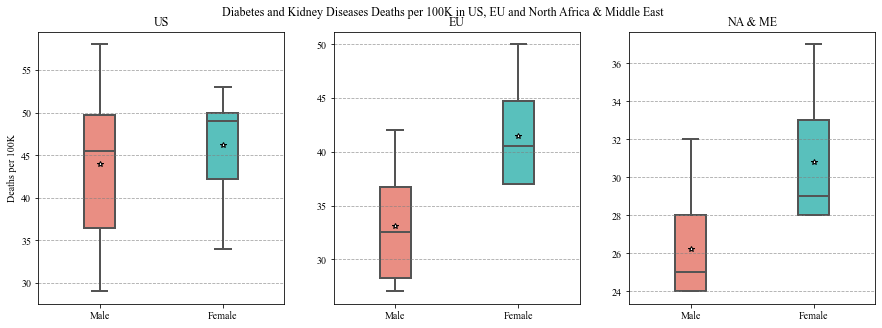

In [128]:
# box plots for genders per region

plt.figure(figsize=(15,5))
# US
plt.subplot(1, 3, 1)
sns.boxplot(x="sex", hue="sex", y="val", data = US_dia, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

plt.xticks(ticks=[0, 1], labels=['Male','Female'], rotation=0)
plt.grid(axis='y', color='gray', linestyle='dashed', alpha=0.7)
plt.legend().remove()
plt.title('US')
plt.xlabel('')
plt.ylabel('Deaths per 100K')
#plt.ylim([0,60])

# EU
plt.subplot(1, 3, 2)
sns.boxplot(x="sex", hue="sex", y="val", data = EU_dia, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

plt.xticks(ticks=[0, 1], labels=['Male','Female'], rotation=0)
plt.grid(axis='y', color='gray', linestyle='dashed', alpha=0.7)
plt.legend().remove()
plt.title('EU')
plt.xlabel('')
plt.ylabel('')
#plt.ylim([0,55])

# NA & ME
plt.subplot(1, 3, 3)
sns.boxplot(x="sex", hue="sex", y="val", data = NA_ME_dia, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

plt.xticks(ticks=[0, 1], labels=['Male','Female'], rotation=0)
plt.grid(axis='y', color='gray', linestyle='dashed', alpha=0.7)
plt.legend().remove()
plt.title('NA & ME')
plt.xlabel('')
plt.ylabel('')
# plt.ylim([0,60])

# customize font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.size"] = 10
plt.rcParams["text.color"] = 'k'

plt.suptitle("Diabetes and Kidney Diseases Deaths per 100K in US, EU and North Africa & Middle East",
            x=0.5, y=0.95)

plt.savefig('Diabetes and Kidney Diseases_2.png')
plt.show()

# Deaths distribution among males and females for each region

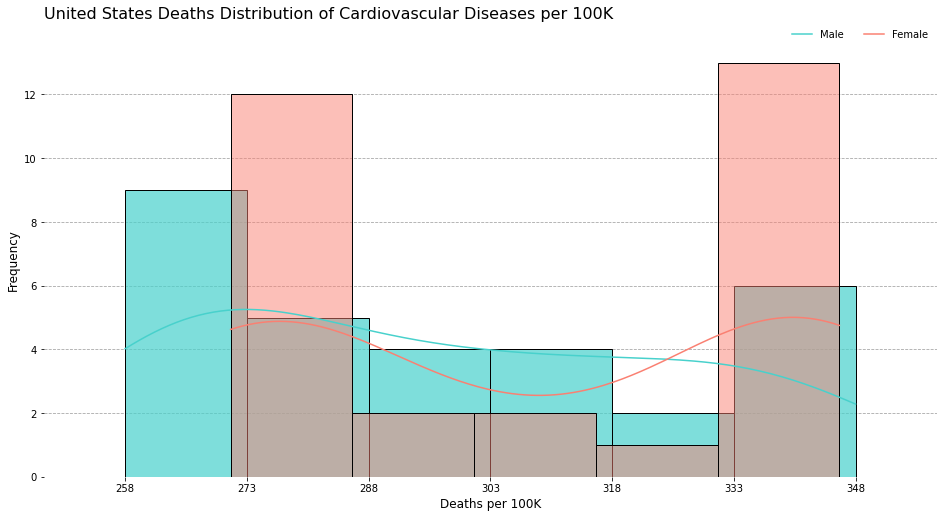

In [12]:
# US Cardiovascular Diseases

fig, ax = plt.subplots(1, figsize=(16, 8))

count, bin_edges = np.histogram(US_car['val'], 6)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10



sns.histplot(data = US_car[US_car['sex']=='Male'],  x='val', kde=True, alpha=0.7, color='MediumTurquoise', binwidth=15)
sns.histplot(data = US_car[US_car['sex']=='Female'],  x='val', kde=True, color='Salmon', binwidth=15)

plt.xlabel('Deaths per 100K', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('United States Deaths Distribution of Cardiovascular Diseases per 100K\n', loc='left', fontsize=16)
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)

plt.xlim(xmin, xmax)
plt.xticks(np.arange(US_car['val'].min(),US_car['val'].max()+15,15))
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

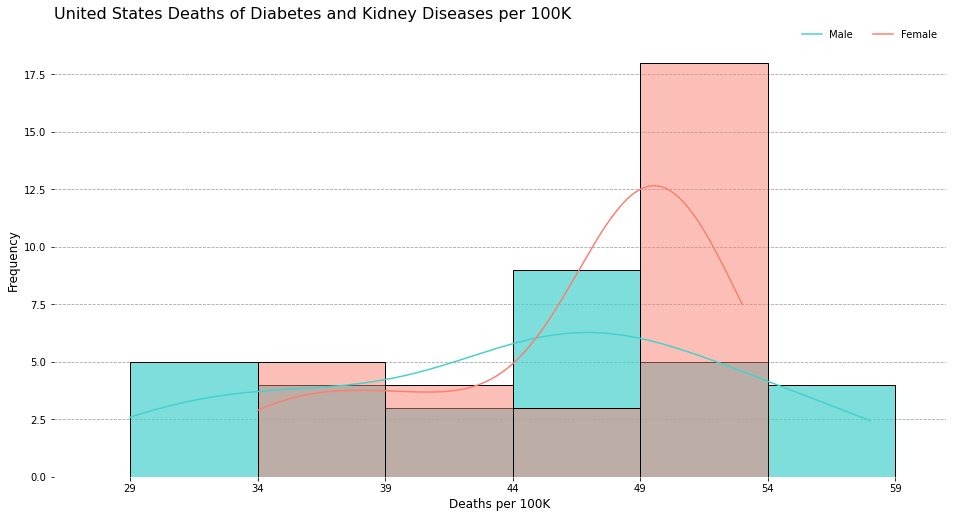

In [13]:
# US Diabetes and Kidney Diseases

fig, ax = plt.subplots(1, figsize=(16, 8))

count, bin_edges = np.histogram(US_dia['val'], 6)
xmin = bin_edges[0] - 3
xmax = bin_edges[-1] + 3



sns.histplot(data = US_dia[US_dia['sex']=='Male'],  x='val', kde=True, alpha=0.7, color='MediumTurquoise', binwidth=5)
sns.histplot(data = US_dia[US_dia['sex']=='Female'],  x='val', kde=True, color='Salmon', binwidth=5)

plt.xlabel('Deaths per 100K', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('United States Deaths of Diabetes and Kidney Diseases per 100K\n', loc='left', fontsize=16)
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)

plt.xlim(xmin, xmax)
plt.xticks(np.arange(US_dia['val'].min(),US_dia['val'].max()+5,5))
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

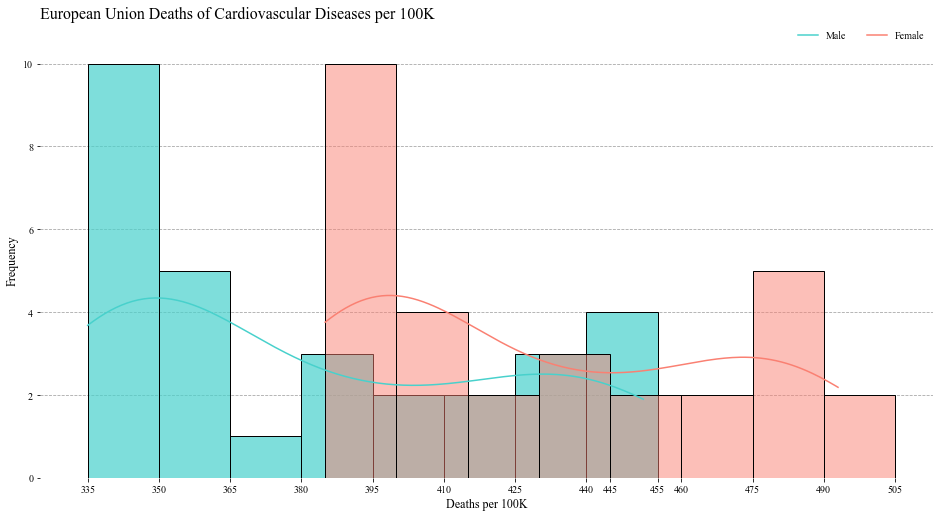

In [96]:
# EU Cardiovascular Diseases

fig, ax = plt.subplots(1, figsize=(16, 8))

count, bin_edges = np.histogram(EU_car['val'], 6)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 20



sns.histplot(data = EU_car[EU_car['sex']=='Male'],  x='val', kde=True, alpha=0.7, color='MediumTurquoise', binwidth=15)
sns.histplot(data = EU_car[EU_car['sex']=='Female'],  x='val', kde=True, color='Salmon', binwidth=15)

plt.xlabel('Deaths per 100K', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('European Union Deaths of Cardiovascular Diseases per 100K\n', loc='left', fontsize=16)
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)

plt.xlim(xmin, xmax)
plt.xticks([335,350,365,380,395,410,425,440,445,455,460,475,490,505])
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

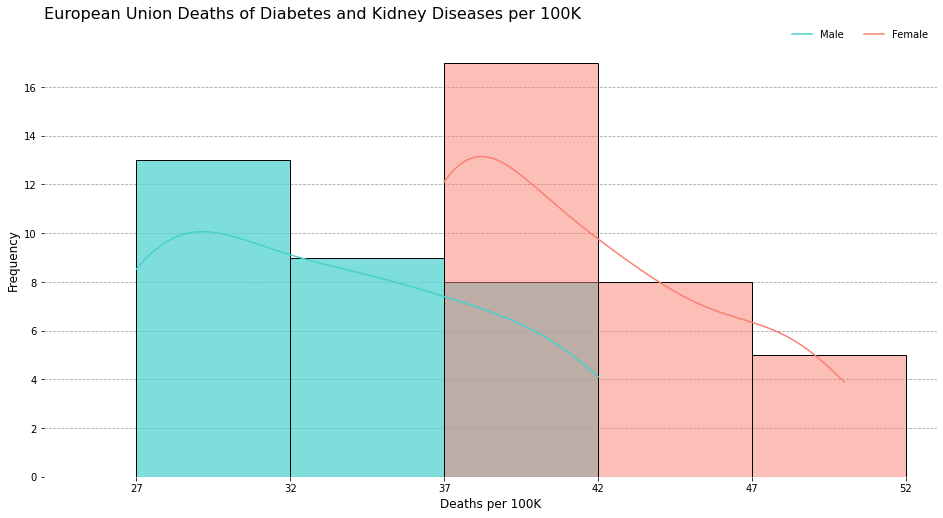

In [15]:
# EU Diabetes and Kidney Diseases

fig, ax = plt.subplots(1, figsize=(16, 8))

count, bin_edges = np.histogram(EU_dia['val'], 6)
xmin = bin_edges[0] - 3
xmax = bin_edges[-1] + 3



sns.histplot(data = EU_dia[EU_dia['sex']=='Male'],  x='val', kde=True, alpha=0.7, color='MediumTurquoise', binwidth=5)
sns.histplot(data = EU_dia[EU_dia['sex']=='Female'],  x='val', kde=True, color='Salmon', binwidth=5)

plt.xlabel('Deaths per 100K', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('European Union Deaths of Diabetes and Kidney Diseases per 100K\n', loc='left', fontsize=16)
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)

plt.xlim(xmin, xmax)
plt.xticks(np.arange(EU_dia['val'].min(),EU_dia['val'].max()+5,5))
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

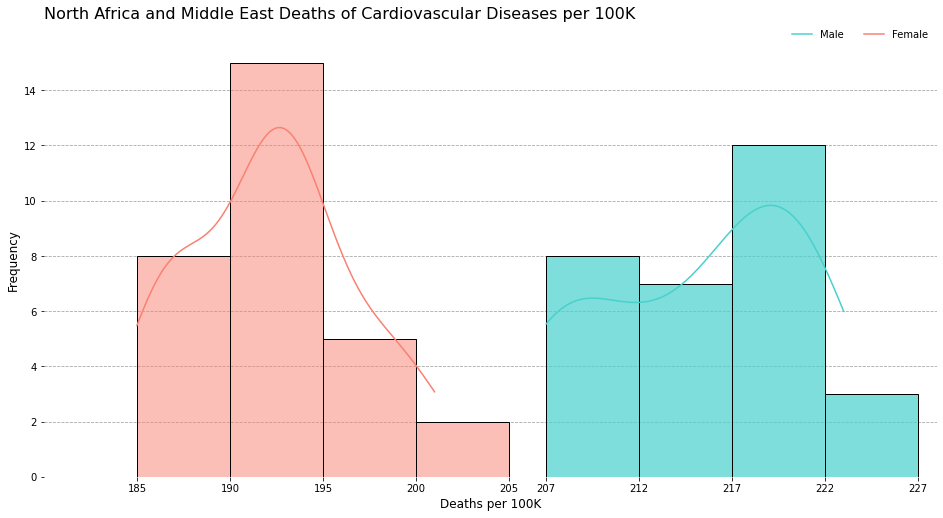

In [16]:
# North Africa and Middle East Cardiovascular Diseases

fig, ax = plt.subplots(1, figsize=(16, 8))

count, bin_edges = np.histogram(NA_ME_car['val'], 6)
xmin = bin_edges[0] - 5
xmax = bin_edges[-1] + 5



sns.histplot(data = NA_ME_car[NA_ME_car['sex']=='Male'],  x='val', kde=True, alpha=0.7, color='MediumTurquoise', binwidth=5)
sns.histplot(data = NA_ME_car[NA_ME_car['sex']=='Female'],  x='val', kde=True, color='Salmon', binwidth=5)

plt.xlabel('Deaths per 100K', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('North Africa and Middle East Deaths of Cardiovascular Diseases per 100K\n', loc='left', fontsize=16)
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)

plt.xlim(xmin, xmax)
plt.xticks([185,190,195,200,205,207,212,217,222,227])
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

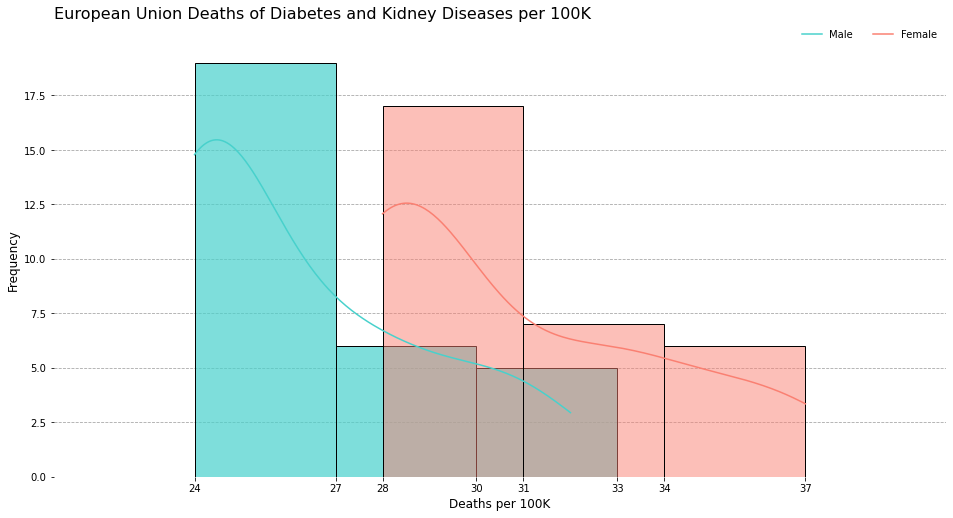

In [17]:
# North Africa and Middle East Diabetes and Kidney Diseases

fig, ax = plt.subplots(1, figsize=(16, 8))

count, bin_edges = np.histogram(NA_ME_dia['val'], 6)
xmin = bin_edges[0] - 3
xmax = bin_edges[-1] + 3



sns.histplot(data = NA_ME_dia[NA_ME_dia['sex']=='Male'],  x='val', kde=True, alpha=0.7, color='MediumTurquoise', binwidth=3)
sns.histplot(data = NA_ME_dia[NA_ME_dia['sex']=='Female'],  x='val', kde=True, color='Salmon', binwidth=3)

plt.xlabel('Deaths per 100K', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('European Union Deaths of Diabetes and Kidney Diseases per 100K\n', loc='left', fontsize=16)
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)

plt.xlim(xmin, xmax)
plt.xticks([24,27,30,33,34,37,31,28])
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# Individual regions with diseases

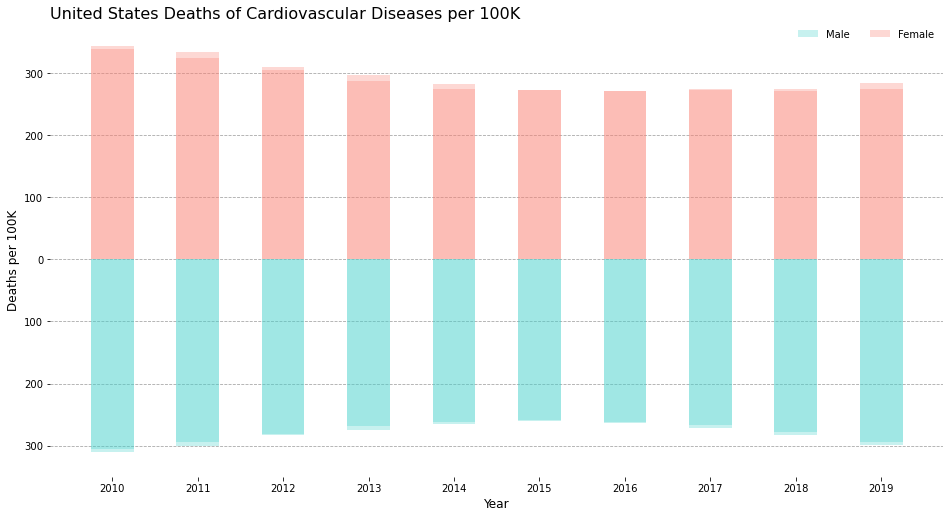

In [18]:
# US cardiovascular

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(US_car['year'][-20:], -1*US_car[US_car['sex']=='Male']['val'][-20:], 
        color = 'MediumTurquoise', width =0.5, alpha=0.3)

plt.bar(US_car['year'][-20:], US_car[US_car['sex']=='Female']['val'][-20:], 
        color = 'Salmon', width =0.5, alpha=0.3)

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# y limits
plt.ylim(-350,350)
# x ticks
plt.xticks(list(range(2010,2020)))
plt.yticks([-300,-200,-100,0,100,200,300], [300,200,100,0,100,200,300])
# title and legend
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('United States Deaths of Cardiovascular Diseases per 100K\n', loc='left', fontsize=16)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths per 100K', fontsize=12)
plt.show()

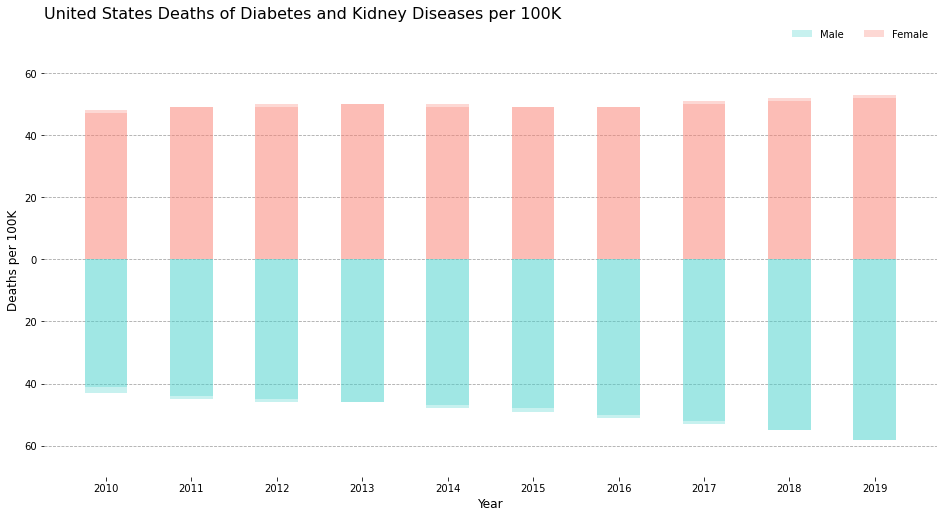

In [19]:
# US diabetes

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(US_dia['year'][-20:], -1*US_dia[US_dia['sex']=='Male']['val'][-20:], 
        color = 'MediumTurquoise', width =0.5, alpha=0.3)

plt.bar(US_dia['year'][-20:], US_dia[US_dia['sex']=='Female']['val'][-20:], 
        color = 'Salmon', width =0.5, alpha=0.3)

# x and y limits
#plt.xlim(-0.6, 10.5)
#plt.ylim(-1600, 2000)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# y limits
plt.ylim(-70,70)
# x ticks
plt.xticks(list(range(2010,2020)))
plt.yticks([-60,-40,-20,0,20,40,60], [60,40,20,0,20,40,60])
# title and legend
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('United States Deaths of Diabetes and Kidney Diseases per 100K\n', loc='left', fontsize=16)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths per 100K', fontsize=12)
plt.show()

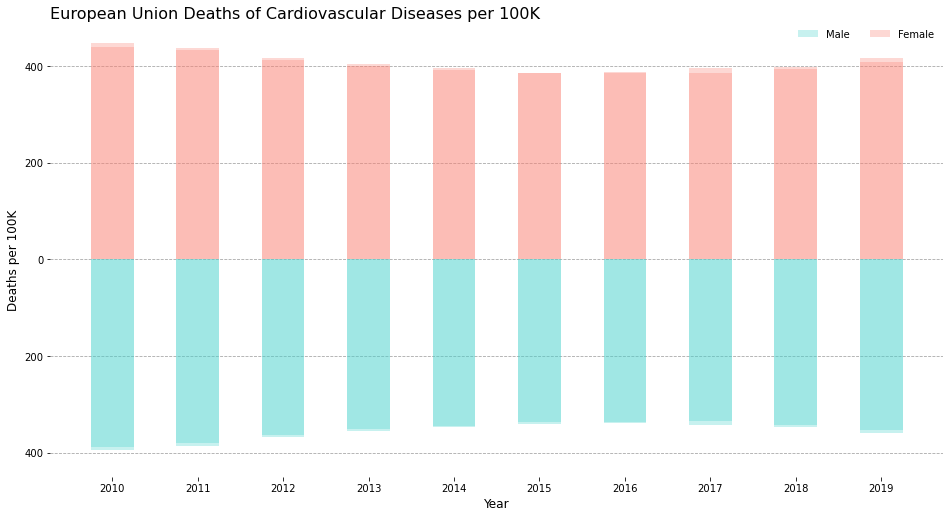

In [20]:
# EU cardiovascular

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(EU_car['year'][-20:], -1*EU_car[EU_car['sex']=='Male']['val'][-20:], 
        color = 'MediumTurquoise', width =0.5, alpha=0.3)

plt.bar(EU_car['year'][-20:], EU_car[EU_car['sex']=='Female']['val'][-20:], 
        color = 'Salmon', width =0.5, alpha=0.3)

# x and y limits
#plt.xlim(-0.6, 10.5)
#plt.ylim(-1600, 2000)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# y limits
plt.ylim(-450,450)
# x ticks
plt.xticks(list(range(2010,2020)))
plt.yticks([-400,-200,0,200,400], [400,200,0,200,400])
# title and legend
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('European Union Deaths of Cardiovascular Diseases per 100K\n', loc='left', fontsize=16)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths per 100K', fontsize=12)
plt.show()

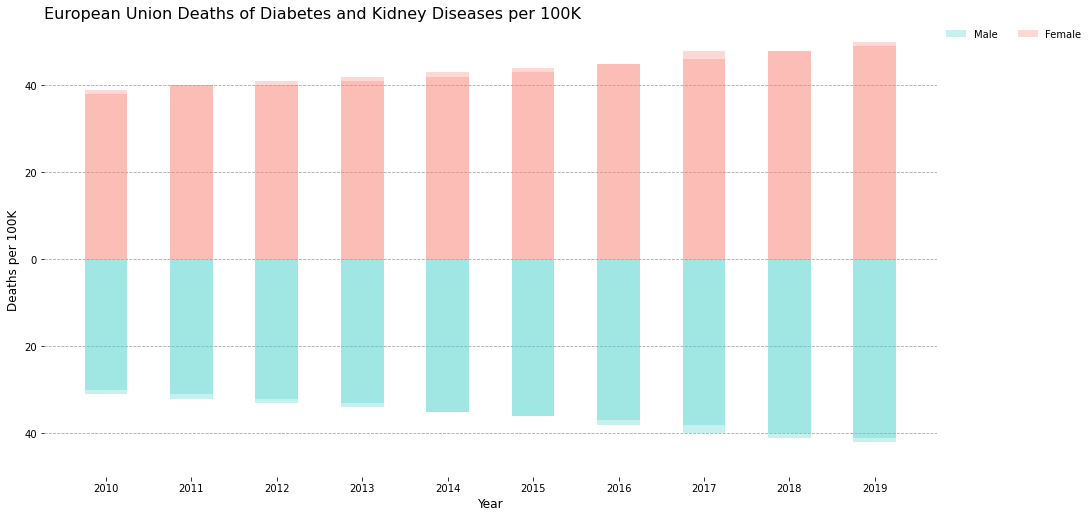

In [21]:
# EU diabetes

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(EU_dia['year'][-20:], -1*EU_dia[EU_dia['sex']=='Male']['val'][-20:], 
        color = 'MediumTurquoise', width =0.5, alpha=0.3)

plt.bar(EU_dia['year'][-20:], EU_dia[EU_dia['sex']=='Female']['val'][-20:], 
        color = 'Salmon', width =0.5, alpha=0.3)

# x and y limits
#plt.xlim(-0.6, 10.5)
#plt.ylim(-1600, 2000)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# y limits
plt.ylim(-50,50)
# x ticks
plt.xticks(list(range(2010,2020)))
plt.yticks([-40,-20,0,20,40], [40,20,0,20,40])
# title and legend
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('European Union Deaths of Diabetes and Kidney Diseases per 100K\n', loc='left', fontsize=16)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths per 100K', fontsize=12)
plt.show()

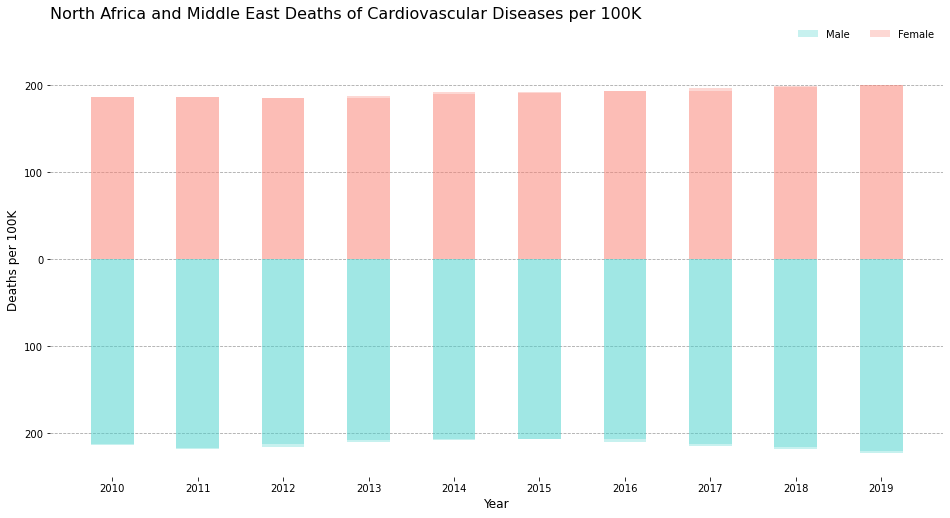

In [22]:
# North Africa and Middle East cardiovascular

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(NA_ME_car['year'][-20:], -1*NA_ME_car[NA_ME_car['sex']=='Male']['val'][-20:], 
        color = 'MediumTurquoise', width =0.5, alpha=0.3)

plt.bar(NA_ME_car['year'][-20:], NA_ME_car[NA_ME_car['sex']=='Female']['val'][-20:], 
        color = 'Salmon', width =0.5, alpha=0.3)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# y limits
plt.ylim(-250,250)
# x ticks
plt.xticks(list(range(2010,2020)))
plt.yticks([-200,-100,0,100,200], [200,100,0,100,200])
# title and legend
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('North Africa and Middle East Deaths of Cardiovascular Diseases per 100K\n', loc='left', fontsize=16)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths per 100K', fontsize=12)
plt.show()

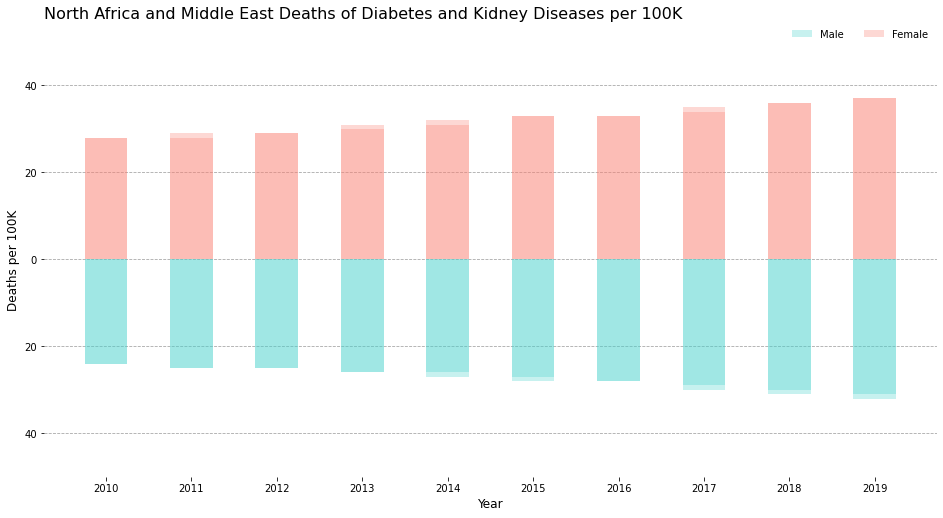

In [23]:
# North Africa and Middle East diabetes

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(NA_ME_dia['year'][-20:], -1*NA_ME_dia[NA_ME_dia['sex']=='Male']['val'][-20:], 
        color = 'MediumTurquoise', width =0.5, alpha=0.3)

plt.bar(NA_ME_dia['year'][-20:], NA_ME_dia[NA_ME_dia['sex']=='Female']['val'][-20:], 
        color = 'Salmon', width =0.5, alpha=0.3)

# x and y limits
#plt.xlim(-0.6, 10.5)
#plt.ylim(-1600, 2000)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# y limits
plt.ylim(-50,50)
# x ticks
plt.xticks(list(range(2010,2020)))
plt.yticks([-40,-20,0,20,40], [40,20,0,20,40])
# title and legend
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('North Africa and Middle East Deaths of Diabetes and Kidney Diseases per 100K\n', loc='left', fontsize=16)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths per 100K', fontsize=12)
plt.show()

# All regions and genders with diseases

In [24]:
# all regions and genders with cardiovascular

US_car_m = grouped_country_gender.get_group(('US','Male','Cardiovascular diseases'))
US_car_f = grouped_country_gender.get_group(('US','Female','Cardiovascular diseases'))

EU_car_m = grouped_country_gender.get_group(('EU','Male','Cardiovascular diseases'))
EU_car_f = grouped_country_gender.get_group(('EU','Female','Cardiovascular diseases'))

NA_ME_car_m = grouped_country_gender.get_group(('NA & ME','Male','Cardiovascular diseases'))
NA_ME_car_f = grouped_country_gender.get_group(('NA & ME','Female','Cardiovascular diseases'))

In [25]:
# all regions and genders with diabetes

US_dia_m = grouped_country_gender.get_group(('US','Male','Diabetes and kidney diseases'))
US_dia_f = grouped_country_gender.get_group(('US','Female','Diabetes and kidney diseases'))

EU_dia_m = grouped_country_gender.get_group(('EU','Male','Diabetes and kidney diseases'))
EU_dia_f = grouped_country_gender.get_group(('EU','Female','Diabetes and kidney diseases'))

NA_ME_dia_m = grouped_country_gender.get_group(('NA & ME','Male','Diabetes and kidney diseases'))
NA_ME_dia_f = grouped_country_gender.get_group(('NA & ME','Female','Diabetes and kidney diseases'))

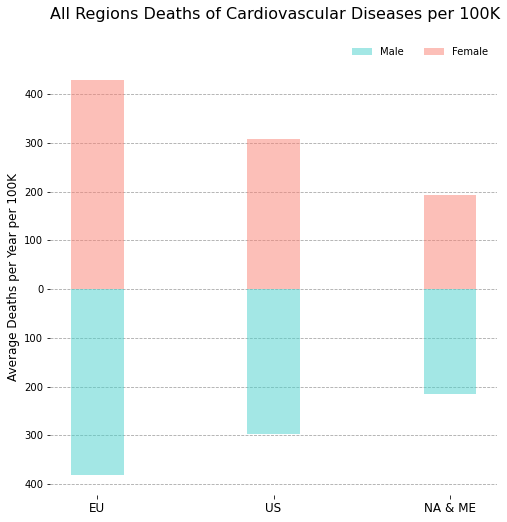

In [26]:
# all regions with cardiovascular

countries = ['EU', 'US', 'NA & ME']

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.bar(countries, [-1*EU_car_m['val'].mean(), -1*US_car_m['val'].mean(), -1*NA_ME_car_m['val'].mean()], 
        color = 'MediumTurquoise', width =0.3, alpha=0.5)

plt.bar(countries, [ EU_car_f['val'].mean(), US_car_f['val'].mean(), NA_ME_car_f['val'].mean()], 
        color = 'Salmon', width =0.3, alpha=0.5)

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# y limits
#plt.ylim(-500,500)
# x ticks
#plt.xticks(list(range(2010,2020)))
plt.yticks([-400,-300,-200,-100,0,100,200,300,400], [400,300,200,100,0,100,200,300,400])
# title and legend
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('All Regions Deaths of Cardiovascular Diseases per 100K\n\n', loc='left', fontsize=16)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticklabels(['EU', 'US', 'NA & ME'], rotation=0, fontsize=12)
# labels

plt.ylabel('Average Deaths per Year per 100K', fontsize=12)
plt.show()

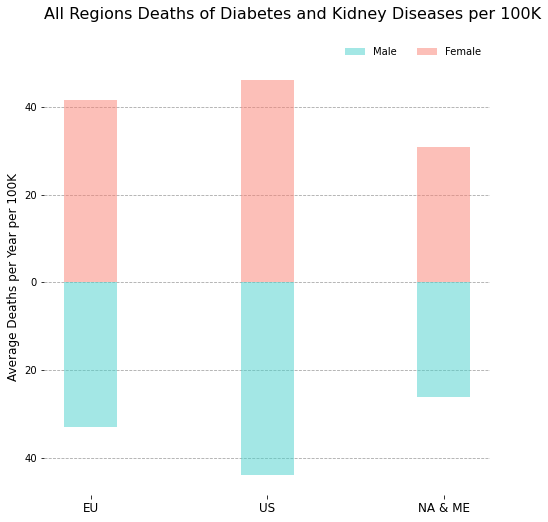

In [27]:
# all regions with diabetes and kidney diseases

countries = ['EU', 'US', 'NA & ME']

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.bar(countries, [-1*EU_dia_m['val'].mean(), -1*US_dia_m['val'].mean(), -1*NA_ME_dia_m['val'].mean()], 
        color = 'MediumTurquoise', width = 0.3, alpha=0.5)

plt.bar(countries, [ EU_dia_f['val'].mean(), US_dia_f['val'].mean(), NA_ME_dia_f['val'].mean()], 
        color = 'Salmon', width = 0.3, alpha=0.5)

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# y limits
#plt.ylim(-500,500)
# x ticks
#plt.xticks(list(range(2010,2020)))
plt.yticks([-40,-20,0,20,40], [40,20,0,20,40])
# title and legend
legend_label = ['Male', 'Female']
plt.legend(legend_label, ncol = 2, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('All Regions Deaths of Diabetes and Kidney Diseases per 100K\n\n', loc='left', fontsize=16)

ax.set_xticklabels(['EU', 'US', 'NA & ME'], rotation=0, fontsize=12)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# labels

plt.ylabel('Average Deaths per Year per 100K', fontsize=12)
plt.show()

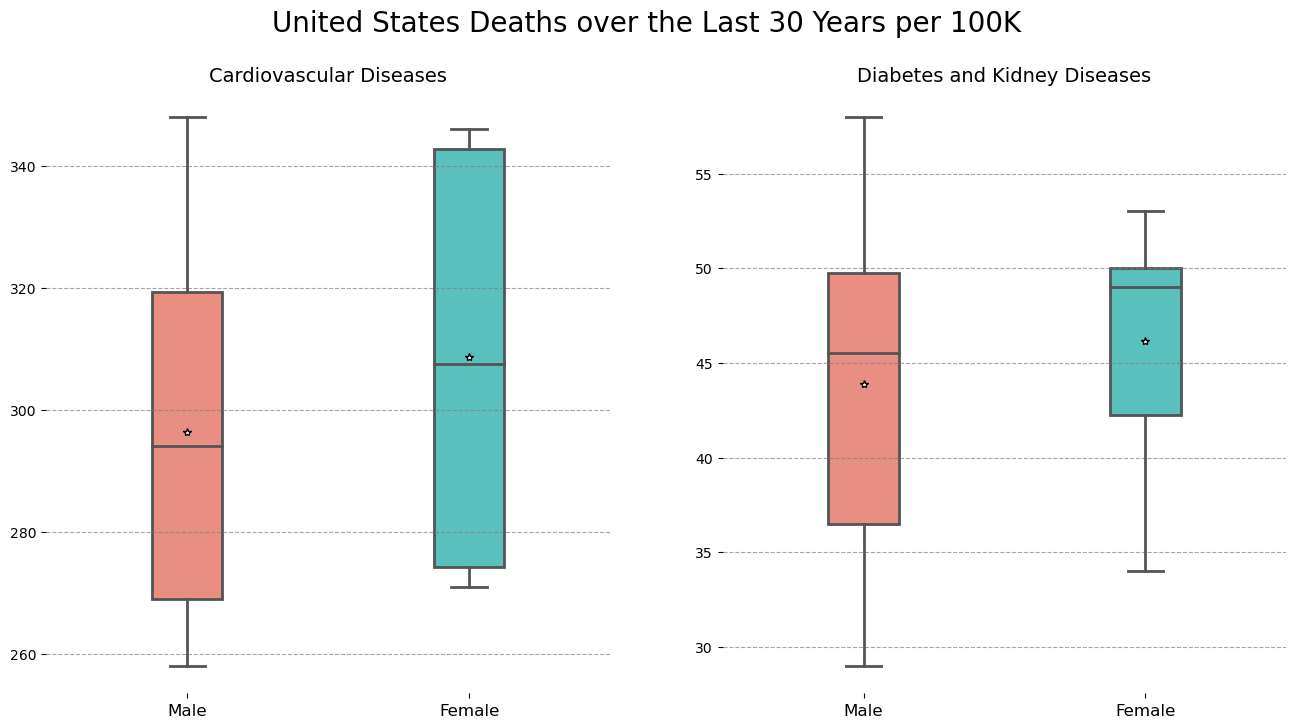

In [28]:
# US

fig, axes = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax = sns.boxplot(x="sex", hue="sex", y="val", data = US_car, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 ax=axes[0], palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

axes[0].set_xticklabels(['Male','Female'], rotation=0, fontsize=12)
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[0].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
axes[0].get_legend().remove()
axes[0].set_title('Cardiovascular Diseases', fontsize=14)
# remove spines
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)

ax = sns.boxplot(x="sex", hue="sex", y="val", data = US_dia, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 ax=axes[1], palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

axes[1].set_xticklabels(['Male','Female'], rotation=0, fontsize=12)


axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
axes[1].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
legend_label = ['Male', 'Female']
axes[1].get_legend().remove()
axes[1].set_title('Diabetes and Kidney Diseases', fontsize=14)
# remove spines
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)



plt.suptitle('United States Deaths over the Last 30 Years per 100K', fontsize=20)
plt.show()

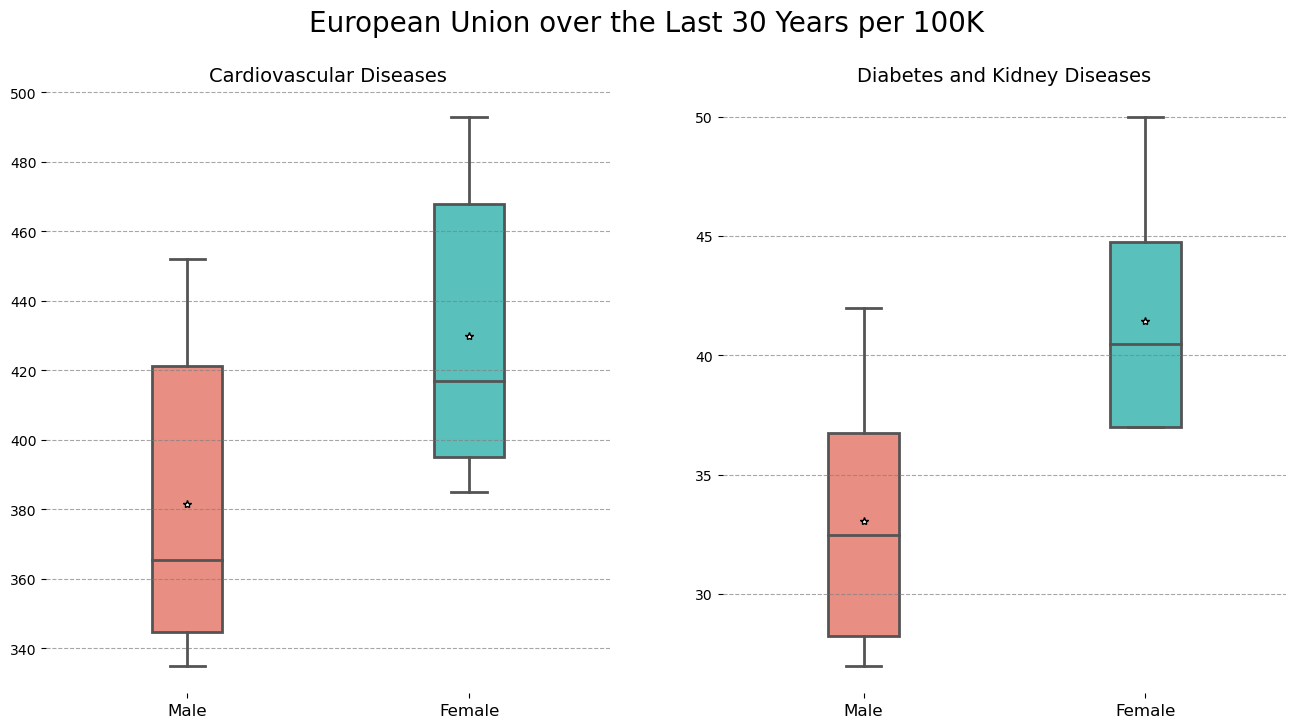

In [29]:
# EU

fig, axes = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax = sns.boxplot(x="sex", hue="sex", y="val", data = EU_car, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 ax=axes[0], palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

axes[0].set_xticklabels(['Male','Female'], rotation=0, fontsize=12)
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[0].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
axes[0].get_legend().remove()
axes[0].set_title('Cardiovascular Diseases', fontsize=14)
# remove spines
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)

ax = sns.boxplot(x="sex", hue="sex", y="val", data = EU_dia, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 ax=axes[1], palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

axes[1].set_xticklabels(['Male','Female'], rotation=0, fontsize=12)


axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
axes[1].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
legend_label = ['Male', 'Female']
axes[1].get_legend().remove()
axes[1].set_title('Diabetes and Kidney Diseases', fontsize=14)
# remove spines
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)



plt.suptitle('European Union over the Last 30 Years per 100K', fontsize=20)
plt.show()

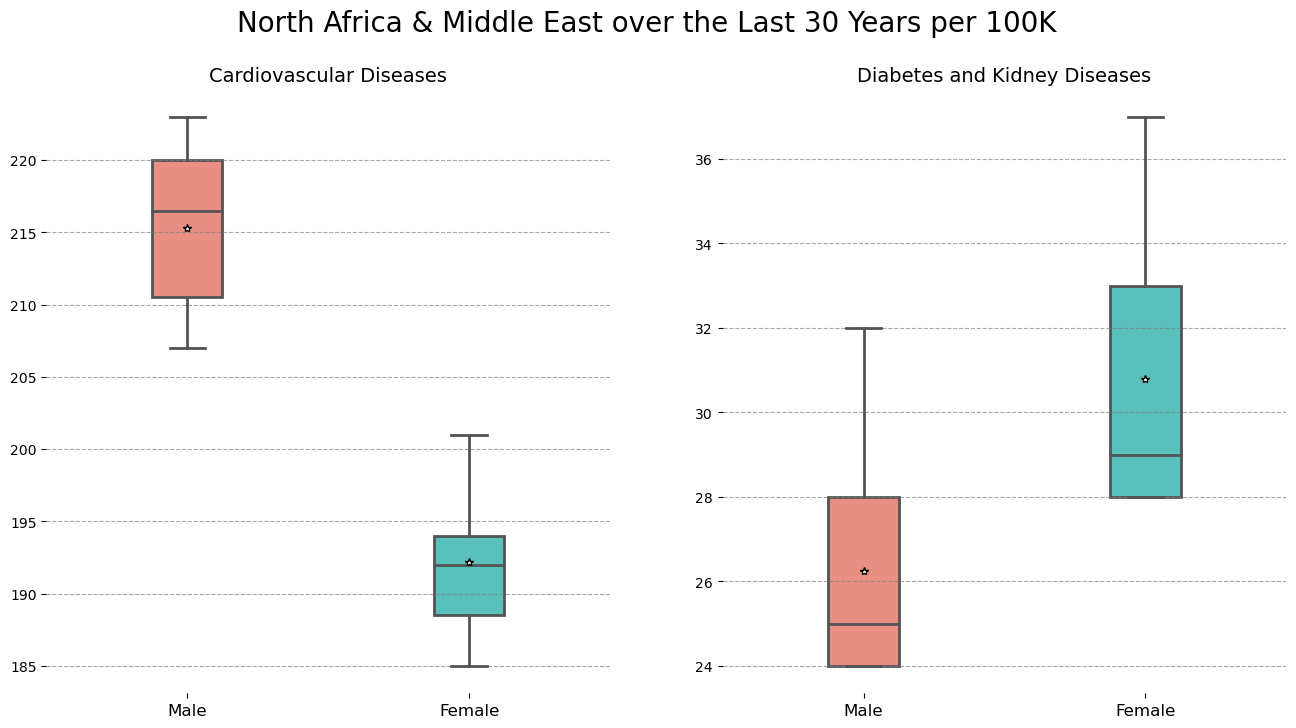

In [30]:
# NA & ME

fig, axes = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax = sns.boxplot(x="sex", hue="sex", y="val", data = NA_ME_car, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 ax=axes[0], palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

axes[0].set_xticklabels(['Male','Female'], rotation=0, fontsize=12)
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[0].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
axes[0].get_legend().remove()
axes[0].set_title('Cardiovascular Diseases', fontsize=14)
# remove spines
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)

ax = sns.boxplot(x="sex", hue="sex", y="val", data = NA_ME_dia, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 ax=axes[1], palette=['Salmon','MediumTurquoise'], dodge =False, width=0.25)

axes[1].set_xticklabels(['Male','Female'], rotation=0, fontsize=12)


axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
axes[1].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
legend_label = ['Male', 'Female']
axes[1].get_legend().remove()
axes[1].set_title('Diabetes and Kidney Diseases', fontsize=14)
# remove spines
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)



plt.suptitle('North Africa & Middle East over the Last 30 Years per 100K', fontsize=20)
plt.show()

In [31]:
concat_countries_car = pd.concat([US_car, EU_car, NA_ME_car], axis=0, ignore_index=True)

concat_countries_dia = pd.concat([US_dia, EU_dia, NA_ME_dia], axis=0, ignore_index=True)

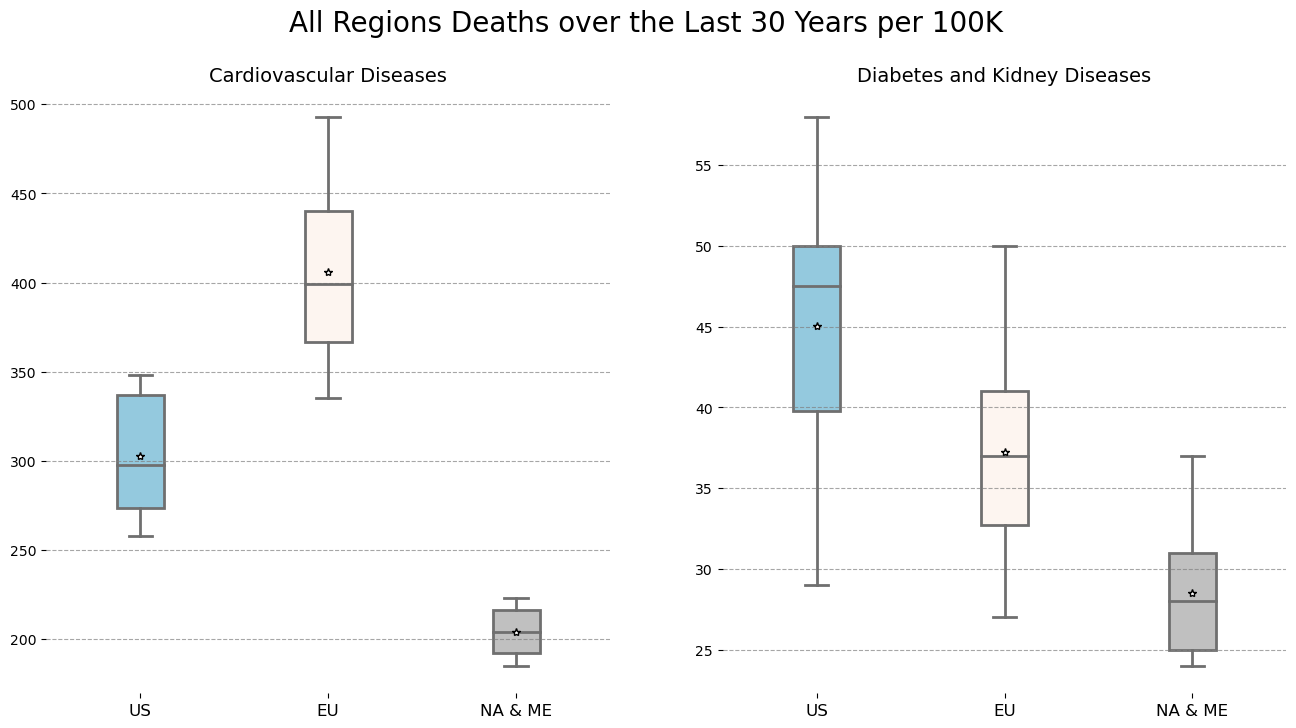

In [32]:
# all regions 

fig, axes = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax = sns.boxplot(x="location", hue="location", y="val", data = concat_countries_car, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 ax=axes[0], palette=['SkyBlue','SeaShell', 'Silver'], dodge =False, width=0.25)

axes[0].set_xticklabels(['US','EU','NA & ME'], rotation=0, fontsize=12)
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[0].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
axes[0].get_legend().remove()
axes[0].set_title('Cardiovascular Diseases', fontsize=14)
# remove spines
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)

ax = sns.boxplot(x="location", hue="location", y="val", data = concat_countries_dia, linewidth=2, showmeans=True, 
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 ax=axes[1], palette=['SkyBlue','SeaShell', 'Silver'], dodge =False, width=0.25)

axes[1].set_xticklabels(['US','EU','NA & ME'], rotation=0, fontsize=12)


axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
axes[1].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
axes[1].get_legend().remove()
axes[1].set_title('Diabetes and Kidney Diseases', fontsize=14)
# remove spines
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)



plt.suptitle('All Regions Deaths over the Last 30 Years per 100K', fontsize=20)
plt.show()